# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [19]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [21]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need

# we do a shallow network, not a deep learning network
# 1 layer network for MNIST

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras import regularizers

from tensorflow.keras import utils



%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

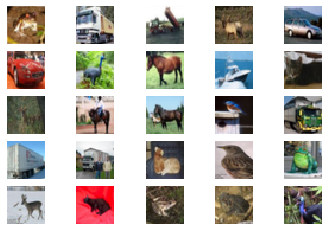

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    
    #prepare print of 25 images
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Cifar still holds 10 classes (from Dog to Aircraft)

show_imgs(X_train)     # get the 25 images (which were previously prepared) from Xtrain
print(X_train.shape)
print(X_test.shape)

In [23]:
# DO NOT DO FOR CIFAR   
# We need the picture to remain a picture (to be able to use filters!!)
#X_train =  X_train.reshape(50000,3072)# flatten input into vector:  change the shape towards (60000, 3072)
# 3072 = 32 * 32 * 3
# could be done by another layer (flatten) but we do it by hand
#X_test =   X_test.reshape(10000,3072)#flatte test                  idem (10000, 3072)


#THis still needs to be done
#Values need to be normalized in range 0 to 1 
X_train =  X_train.astype('float32')       # change the type towards float32  (from integer)
X_test =   X_test.astype('float32')        # same for test set
X_train = X_train / 255.0                   #normalize the range to be between 0.0 and 1.0 (255 = max value)
X_test =  X_test / 255.0                    # same for xtest
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [24]:
n_classes = 10
#use util function from keras
Y_train = utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [34]:
#Exercise 8.2  One Layer Network
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model = Sequential()     #define sequential model

#add Flatten Layer to go from 32x32x3 to (1,3072). 
model.add(Flatten(input_shape=(32,32,3)))
#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
#model.add(Dense(n_classes, input_shape=(1,3072), activation = 'softmax',kernel_regularizer=regularizers.l2(0.05)))

#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
model.add(Dense(n_classes, activation = 'softmax',kernel_regularizer=regularizers.l2(0.05)))
    

# ... print model infomration with summary() method 
model.summary()

# Conclusion 
# Accuracy reached 36% on epoch 4

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


# Two-layers network and weight visualisation
###  Start with the following configuration : 128 neurons on the hidden layer, 30 training epochs, a batch size of 128 images, a eelu relu activation on the hidden layer, a softmax activation at the output layer, categorical-crossentropy loss and adam optimizer. You don’t need to use a L2 regularizer in this model. This configuration should give you an accuracy around 45% onthe test set.

In [38]:
#Exercise 8.2  Two Layer Network
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model = Sequential()     #define sequential model

#add Flatten Layer to go from 32x32x3 to (1,3072). 
model.add(Flatten(input_shape=(32,32,3)))

#Add a hidden Layer with 128 neurons
model.add(Dense(128, activation = 'relu'))
#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
model.add(Dense(n_classes, activation = 'softmax'))
    

# ... print model infomration with summary() method 
model.summary()




Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


# Exercise 3 CNN with Keras on CIFAR10
###  Modify your MLP version from the previous exercise towards Convolutional Neural Networks

In [48]:
#Exercise 8.3


E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample

# ... define the model as a Sequential type
model = Sequential()     #define sequential model

# this applies 32 convolution filters of size 1x1 each. 
# Stride is set to (1,1) 
model.add(Conv2D(32, (3, 3),strides=(1, 1), padding = "same", input_shape=(32, 32, 3) ))

#add Actication Function Relu with alpha=0.0  (wert für x < 0) max_value = 0
model.add(Activation('relu'))


#add MaxPolling layer for downsampling
# Size = 2
# Resulting Resolution 16 x 16 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))

#add Flatten Layer to go from 16x16x32 to (1,8192). 
model.add(Flatten())
#Add a last dense layers for the 10 classes, careful input is from MaxPolling -->(16,16,32)
model.add(Dense(n_classes, input_shape=(1,8192), activation = 'softmax'))
    

# ... print model infomration with summary() method 
model.summary()

# Conclusion
# val_accuracy: 0.6083

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [49]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])    #compile defined model (with loss function, optimizer and metrics )
# optimizer defines how the learning rate and so on are updated / changed for better performance
# metrics saves the computed vales for later prints and inspections  (we look for accuracy)

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
print(X_train.shape)
print(Y_train.shape)
log = model.fit(X_train,Y_train, batch_size = B,epochs = E, verbose = 1, validation_data = (X_test,Y_test))
#validation is the test with test data
# log = logged data from metrics (accuracy)


(50000, 32, 32, 3)
(50000, 10)
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 17s 349us/sample - loss: 1.6039 - accuracy: 0.4393 - val_loss: 1.3852 - val_accuracy: 0.5124
Epoch 2/5
50000/50000 [==============================] - 16s 329us/sample - loss: 1.3013 - accuracy: 0.5512 - val_loss: 1.2577 - val_accuracy: 0.5599
Epoch 3/5
50000/50000 [==============================] - 17s 337us/sample - loss: 1.2001 - accuracy: 0.5847 - val_loss: 1.2355 - val_accuracy: 0.5673
Epoch 4/5
50000/50000 [==============================] - 17s 342us/sample - loss: 1.1310 - accuracy: 0.6087 - val_loss: 1.1569 - val_accuracy: 0.5945
Epoch 5/5
50000/50000 [==============================] - 18s 358us/sample - loss: 1.0813 - accuracy: 0.6271 - val_loss: 1.1154 - val_accuracy: 0.6083


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

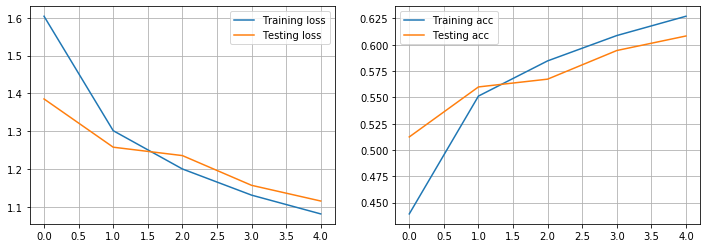

In [50]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [56]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose = 0)# evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.1153681453704833
Test accuracy: 0.6083


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [57]:
pred = model.predict_classes(X_test, verbose=0)
#plot confusion matrix --> how is performance of network
confusion_matrix(y_test, pred)

array([[679,  31,  71,  18,   9,   7,  20,  11, 122,  32],
       [ 29, 757,  18,   7,   8,   7,   8,   9,  72,  85],
       [ 84,  10, 509,  38,  94,  91,  80,  57,  29,   8],
       [ 20,  17, 107, 310,  91, 212, 117,  71,  34,  21],
       [ 33,   5, 163,  38, 496,  51, 102,  89,  19,   4],
       [ 16,   9, 105, 100,  65, 535,  54,  90,  21,   5],
       [ 12,   8,  66,  37,  58,  27, 756,  18,  10,   8],
       [ 28,   6,  44,  39,  58,  86,  22, 689,   7,  21],
       [102,  59,  21,   5,   4,  12,   7,   8, 756,  26],
       [ 55, 171,  20,  10,  10,  14,  18,  36,  70, 596]], dtype=int64)

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3, 3, 3, 32)
(32,)
(8192, 10)
(10,)


ValueError: cannot reshape array of size 8192 into shape (32,32,3)

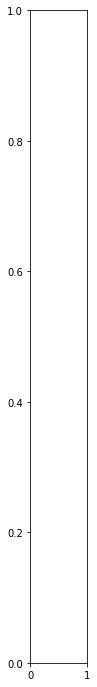

In [58]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
    
#for exercise 8.1
# there are 2 sets of weights alltough there is only 1 layer
# (784,10) (weights of layer 1)
# (10,)  (bias)
    
    
w1 = weights[2]
f = plt.figure(figsize=(12,12))
for i in range(10):                       # for all weight groups (to all 10 neurons)   plot those weights
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                          #get the weights landing to neuron i
    im = im.reshape(32,32,3)                #reshape the vector of weights into 28x28 image (from 784)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)                      # get the min of im
    max = np.max(im)                      # get the max of im
    im = (im - min)/(max - min)           # perform a min-max norm  (so values are normed between  0 and 1)
    im = im * 255                         # multiply by 255  convert to 8 bits pixel values 
    im = np.round(im).astype(int)         # round and convert to int                    
    ax.axis('off')
    ax.imshow(im)